In [1]:
%pylab inline
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = [x/255.0 for x in [x_train, x_test]]
y_train, y_test = [tf.keras.utils.to_categorical(x) for x in [y_train, y_test]]

Populating the interactive namespace from numpy and matplotlib


In [2]:
opt = Adam()
ZDIM = 100

In [9]:
# discriminator
# 0 if it's fake, 1 if it's real
x = in1 = Input((28,28))
x = Reshape((28,28,1))(x)

x = Conv2D(64, (5,5), padding='same', strides=(2,2))(x)
x = BatchNormalization()(x)
x = ELU()(x)

x = Conv2D(128, (5,5), padding='same', strides=(2,2))(x)
x = BatchNormalization()(x)
x = ELU()(x)

x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = ELU()(x)
x = Dense(1, activation='sigmoid')(x)
dm = Model(in1, x)
dm.compile(opt, 'binary_crossentropy')
dm.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1664      
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
elu_6 (ELU)                  (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 7, 7, 128)         512 

In [7]:
# generator, output digits
x = in1 = Input((ZDIM,))

x = Dense(7*7*64)(x)
x = BatchNormalization()(x)
x = ELU()(x)
x = Reshape((7,7,64))(x)

x = Conv2DTranspose(128, (5,5), strides=(2,2), padding='same')(x)
x = BatchNormalization()(x)
x = ELU()(x)

x = Conv2DTranspose(1, (5,5), strides=(2,2), padding='same')(x)
x = Activation('sigmoid')(x)
x = Reshape((28,28))(x)

gm = Model(in1, x)
gm.compile('adam', 'mse')
gm.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_4 (Batch (None, 3136)              12544     
_________________________________________________________________
elu_4 (ELU)                  (None, 3136)              0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 14, 14, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 128)       512 

In [10]:
# GAN
dm.trainable = False
x = dm(gm.output)
tm = Model(gm.input, x)
tm.compile(opt, 'binary_crossentropy')

dlosses, glosses = [], []

   0: dloss:  0.8530   gloss:  0.9935
  50: dloss:  0.5762   gloss:  0.7903
 100: dloss:  0.5486   gloss:  0.9255
 150: dloss:  0.5721   gloss:  0.9220
 200: dloss:  0.6042   gloss:  0.8743


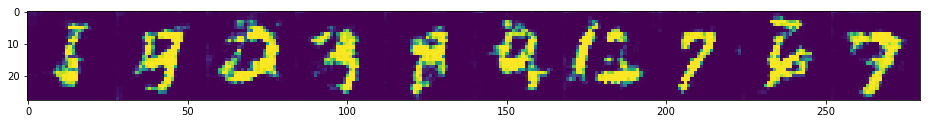

 250: dloss:  0.6120   gloss:  0.8759
 300: dloss:  0.6119   gloss:  0.8819
 350: dloss:  0.6210   gloss:  0.8945
 400: dloss:  0.5705   gloss:  0.9139
 450: dloss:  0.5892   gloss:  0.9189


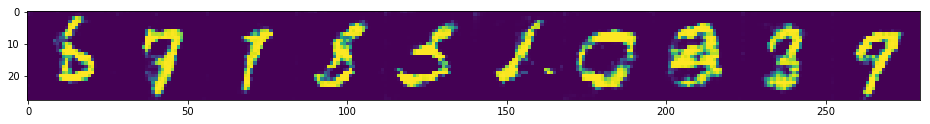

 500: dloss:  0.5671   gloss:  0.9480
 550: dloss:  0.5786   gloss:  0.9815
 600: dloss:  0.5541   gloss:  0.9939
 650: dloss:  0.5342   gloss:  0.9975
 700: dloss:  0.5479   gloss:  1.0115


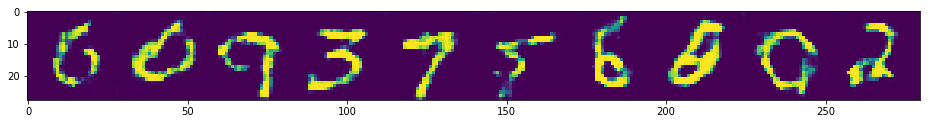

 750: dloss:  0.5254   gloss:  1.0163
 800: dloss:  0.5220   gloss:  1.0649
 850: dloss:  0.5122   gloss:  1.0398
 900: dloss:  0.5389   gloss:  1.0844
 950: dloss:  0.4946   gloss:  1.1375


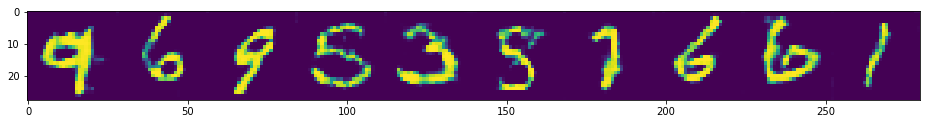

1000: dloss:  0.4962   gloss:  1.1244
1050: dloss:  0.4727   gloss:  1.1847
1100: dloss:  0.5086   gloss:  1.1708
1150: dloss:  0.5067   gloss:  1.2010
1200: dloss:  0.4950   gloss:  1.1720


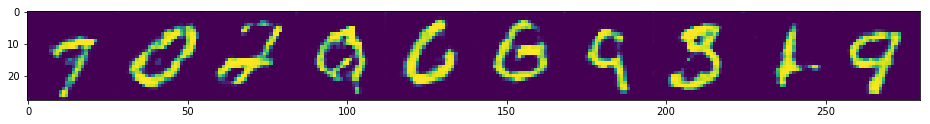

1250: dloss:  0.5079   gloss:  1.2473
1300: dloss:  0.4715   gloss:  1.2662
1350: dloss:  0.4703   gloss:  1.2485
1400: dloss:  0.4549   gloss:  1.3527
1450: dloss:  0.4640   gloss:  1.2482


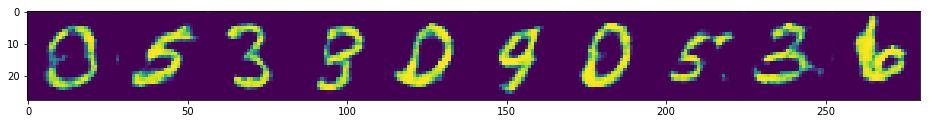

1500: dloss:  0.4279   gloss:  1.2737
1550: dloss:  0.4597   gloss:  1.2890
1600: dloss:  0.4764   gloss:  1.3193
1650: dloss:  0.4733   gloss:  1.4317
1700: dloss:  0.4715   gloss:  1.4243


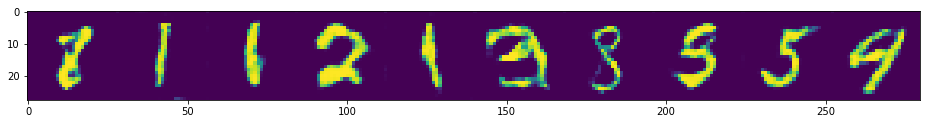

1750: dloss:  0.3894   gloss:  1.4267
1800: dloss:  0.4100   gloss:  1.3714
1850: dloss:  0.3913   gloss:  1.4775
1900: dloss:  0.4334   gloss:  1.5657
1950: dloss:  0.4103   gloss:  1.3396


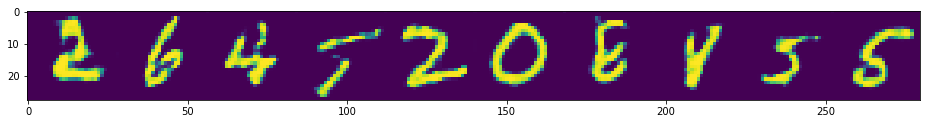

2000: dloss:  0.4373   gloss:  1.4669
2050: dloss:  0.3693   gloss:  1.5155
2100: dloss:  0.3813   gloss:  1.6003
2150: dloss:  0.4437   gloss:  1.4730
2200: dloss:  0.4124   gloss:  1.5253


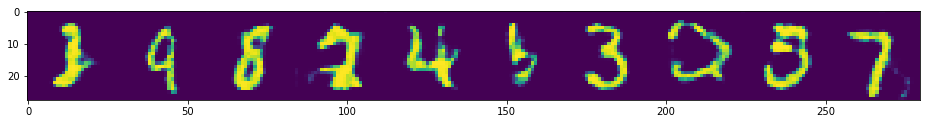

2250: dloss:  0.4240   gloss:  1.5549
2300: dloss:  0.4160   gloss:  1.6392
2350: dloss:  0.4055   gloss:  1.6070
2400: dloss:  0.3872   gloss:  1.5693
2450: dloss:  0.4162   gloss:  1.4652


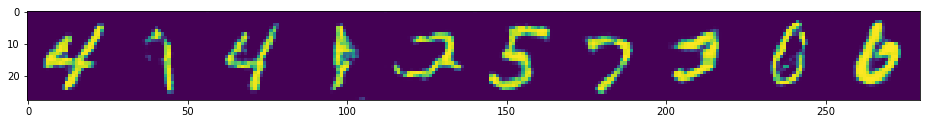

2500: dloss:  0.4183   gloss:  1.6544
2550: dloss:  0.4055   gloss:  1.7008
2600: dloss:  0.3623   gloss:  1.6645
2650: dloss:  0.4118   gloss:  1.5990
2700: dloss:  0.3844   gloss:  1.8056


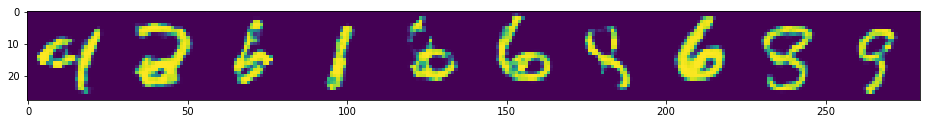

2750: dloss:  0.3678   gloss:  1.5909
2800: dloss:  0.3847   gloss:  1.7735
2850: dloss:  0.3490   gloss:  1.8231
2900: dloss:  0.4394   gloss:  1.5528
2950: dloss:  0.4166   gloss:  1.6545


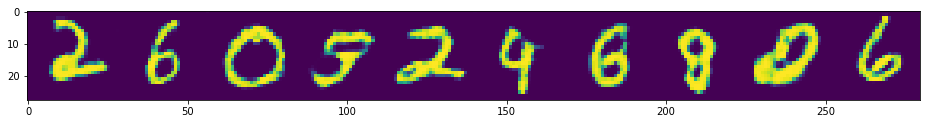

3000: dloss:  0.4769   gloss:  1.7003
3050: dloss:  0.3172   gloss:  1.6219
3100: dloss:  0.3725   gloss:  1.7407
3150: dloss:  0.3587   gloss:  1.7735
3200: dloss:  0.3050   gloss:  1.8453


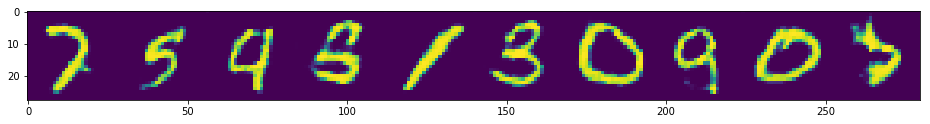

3250: dloss:  0.2894   gloss:  1.8834
3300: dloss:  0.3664   gloss:  1.7823
3350: dloss:  0.3413   gloss:  1.8770
3400: dloss:  0.3499   gloss:  1.9991
3450: dloss:  0.4063   gloss:  1.6908


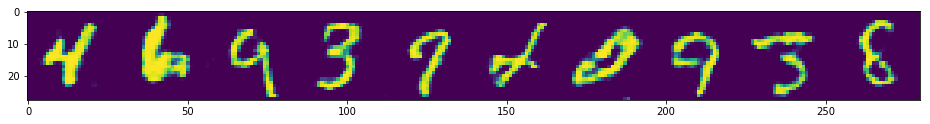

3500: dloss:  0.3445   gloss:  1.8231
3550: dloss:  0.3135   gloss:  1.9075
3600: dloss:  0.3822   gloss:  1.9269
3650: dloss:  0.3136   gloss:  1.9893
3700: dloss:  0.3624   gloss:  1.9704


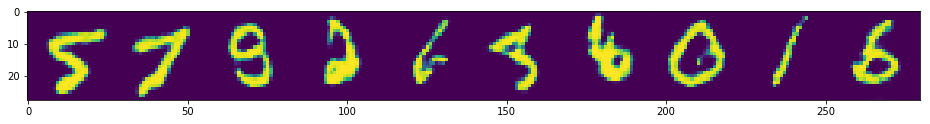

3750: dloss:  0.2842   gloss:  1.9415
3800: dloss:  0.2733   gloss:  1.7892
3850: dloss:  0.3417   gloss:  1.9479
3900: dloss:  0.3914   gloss:  1.9326
3950: dloss:  0.3004   gloss:  1.9249


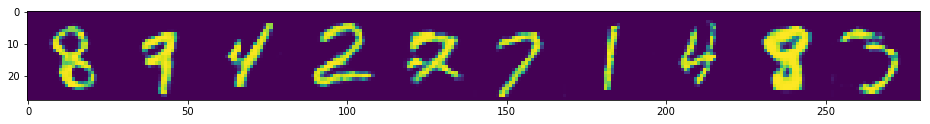

4000: dloss:  0.2784   gloss:  1.9177
4050: dloss:  0.2353   gloss:  2.2748
4100: dloss:  0.3387   gloss:  2.0247
4150: dloss:  0.3923   gloss:  2.0130
4200: dloss:  0.3360   gloss:  2.1146


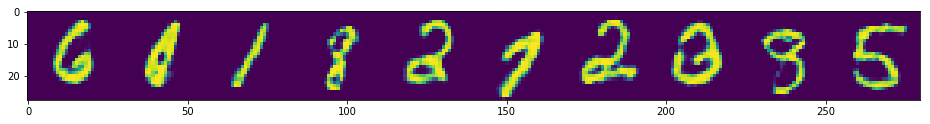

4250: dloss:  0.3620   gloss:  2.1525
4300: dloss:  0.2519   gloss:  2.0966
4350: dloss:  0.3506   gloss:  2.3627
4400: dloss:  0.2444   gloss:  2.0178
4450: dloss:  0.3580   gloss:  1.9932


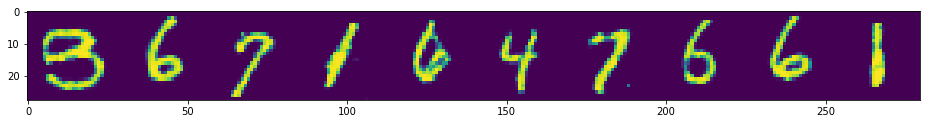

4500: dloss:  0.2655   gloss:  2.0777
4550: dloss:  0.3709   gloss:  2.0891
4600: dloss:  0.2823   gloss:  2.4987
4650: dloss:  0.3672   gloss:  2.1716
4700: dloss:  0.2514   gloss:  2.1548


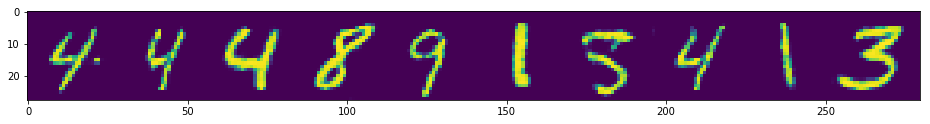

4750: dloss:  0.2776   gloss:  2.1459
4800: dloss:  0.2878   gloss:  2.1513
4850: dloss:  0.2117   gloss:  2.1067
4900: dloss:  0.2437   gloss:  2.2271
4950: dloss:  0.2415   gloss:  2.2646


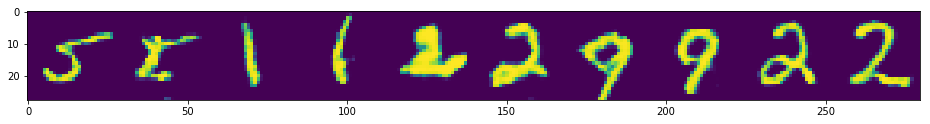

In [11]:
BS = 256
# GAN training loop
for i in range(5000):
  # train discriminator
  dm.trainable = True
  real_i = x_train[np.random.choice(x_train.shape[0], BS)]
  fake_i = gm.predict_on_batch(np.random.normal(0,1,size=(BS,ZDIM)))
  dloss_r = dm.train_on_batch(real_i, np.ones(BS))
  dloss_f = dm.train_on_batch(fake_i, np.zeros(BS))
  dloss = (dloss_r + dloss_f)/2

  # train generator
  dm.trainable = False
  gloss_0 = tm.train_on_batch(np.random.normal(0,1,size=(BS,ZDIM)), np.ones(BS))
  gloss_1 = tm.train_on_batch(np.random.normal(0,1,size=(BS,ZDIM)), np.ones(BS))
  gloss = (gloss_0 + gloss_1)/2

  if i%50 == 0:
    print("%4d: dloss:%8.4f   gloss:%8.4f" % (i, dloss, gloss))
  dlosses.append(dloss)
  glosses.append(gloss)
    
  if i%250 == -1%250:
    figsize(16,16)
    figure()
    imshow(np.concatenate(gm.predict(np.random.normal(size=(10,ZDIM))), axis=1))
    plt.show()

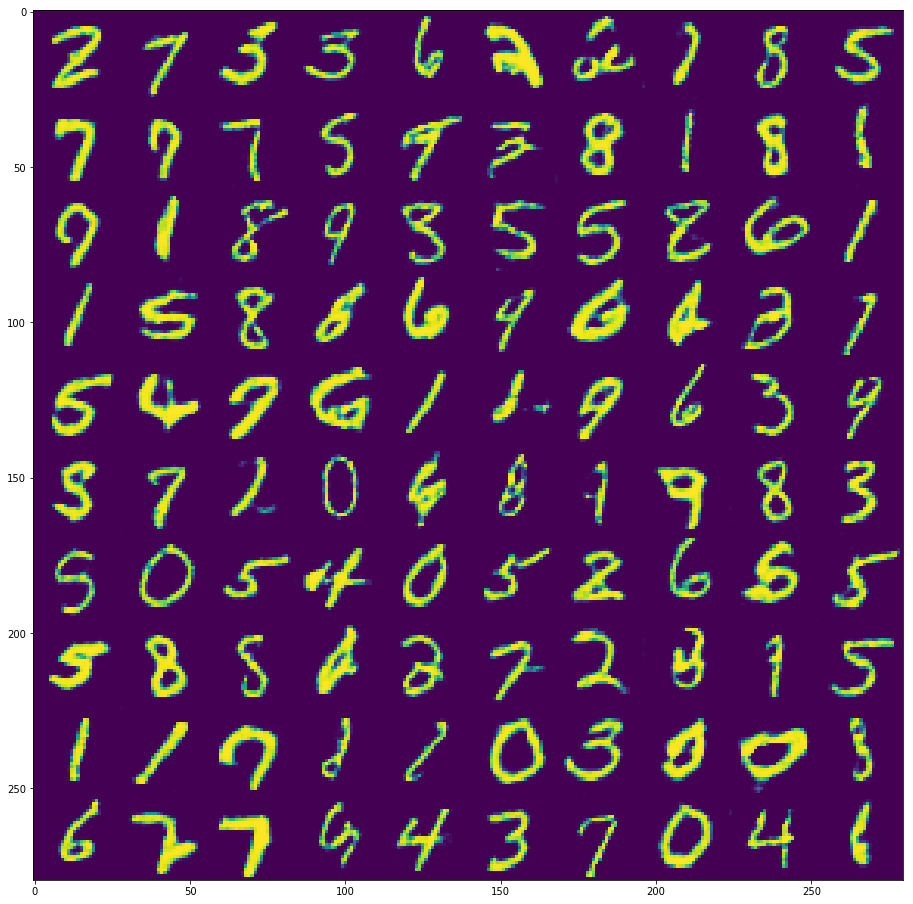

In [12]:
x = []
for i in range(10):
  x.append(np.concatenate(gm.predict(np.random.normal(size=(10,ZDIM))), axis=1))
imshow(np.concatenate(x, axis=0))